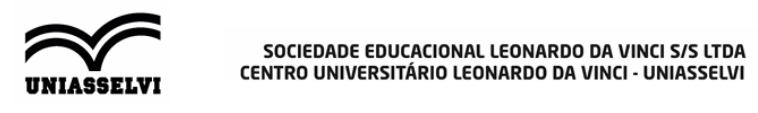

#**Projeto II - Futuro dos Dados e Aplicação de Big Data - Etapa I**

## Descrição do Tema
A Base de dados utilizada neste projeto foi a Breast_Cancer.csv.

A base pode ser encontrada neste link: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer?resource=download





>## Objetivo


O objetivo do atual projeto é identificar se um paciente com câncer de mama irá sobreviver ou não ao câncer a partir do treinamento de uma Rede Neural Multicamada.

>## Especificação Técnica

A base de dados está no formato csv, sendo sua divisão em 16 colunas e 4024 linhas.

Descrição Inicial:

* Tumor: Usando o sistema TNM, o “T” mais uma letra ou número (0 a 4) é usado para descrever o tamanho e a localização do tumor. O tamanho do tumor é medido em centímetros (cm). Um centímetro é aproximadamente igual à largura de uma caneta ou lápis padrão
* Nó: O “N” no sistema de estadiamento TNM significa linfonodos. Esses pequenos órgãos em forma de feijão ajudam a combater infecções. Os linfonodos próximos de onde o câncer começou são chamados de linfonodos regionais;
* Metástase: O “M” no sistema TNM descreve se o câncer se espalhou para outras partes do corpo, chamado de metástase. Isso não é mais considerado câncer em estágio inicial ou localmente avançado;
* Estágio: Para saber o Estágio do tumor é feito uma combinação dos elementos "T", "N" e "M".
* Classificação histológica: São classificações que descrevem o quão diferente a arquitetura do tecido tumoral está diferente do tecido mamário normal:
  * Grau 1 ou bem diferenciado (Pontuação 3, 4 ou 5). As células estão crescendo mais lentamente e se parecem mais com o tecido normal da mama.
  * Grau 2 ou moderadamente diferenciado (Pontuação 6 ou 7). Têm características entre os tipos 1 e 3.
  * Grau 3 ou pouco diferenciado (Pontuação 8 ou 9). As células não tem características normais e tendem a crescer e se disseminar de forma mais agressiva.
  * Indiferenciado:alta taxa de agressividade, pois o tecido sofre uma mutação tão grande que perde as características da célula original.

## Descrição das Features:

* Idade: Idade do paciente;
* Raça: Raça do paciente;
* Estado Civil: Estado civil do paciente;
* Estágio do Tumor: Há 4 estágios, sendo o T1 o menos agressivo;
* Estagio do Nodulo: Há 3 estágios, sendo o N1 o menos agressivo;
* Estagio do cancer: IIA, IIB, IIIA, IIIC,IIIB, sendo o IIA o menos agressivo;
* Diferenciar:É a Classificação histológica que é dividida em bem diferenciado, moderadamente diferenciado, pouco diferenciado e indiferenciado;
* Grau: Há 3 graus do tumor, sendo o Grau 1 o tumor com crescimento mais lento;
* Localizacao: Há duas divisões: a regional que é a região próxima onde o tumor começou e a distante que fica mais distante da origem do tumor; 
* Tamanho do tumor: O tamanho em mm do Tumor;
* Status do Estrogenio: Positivo ou Negativo;
* Status da Progesterona: Positivo ou Negativo;
* Nó regional examidado:É a quantidade de Nós que foram examinados;
* Nó Regional Positivo:É a quantidade de Nós que resultaram em positivo para o câncer;
* Meses de Sobrevivencia:É a quantidade(meses) de duração do tratamento desde a descoberta do câncer;
* Status: Se o paciente após a finalização do tratamento ainda está vivo ou não.

**Divisão da base de dados:** 80% Train e 20% Test

**Métodos de Pré-processamento:** Remoção de informações duplicadas e/ou nulas, tradução para Português do nome das colunas para facilitar a compreensão e  transformação de dados categóricos em numéricos para aplicar alguns métodos de Machine Learning, utilização de um dataloader para que o modelo não veja sempre as mesmas amostras. 

**Tarefa de Aprendizado:** Regressão

**Modos de aprendizado:** Supervisionado.

**Bibliotecas utilizadas:** Pandas, OS, Torch, Sklearn,Matplotlib

**Algoritmos Avaliados:** Pytorch 

**Avaliação de desempenho:** Criação da Função L1Loss para acompanhar a evolução de desempenho, através da biblioteca Torch. Dentro da função Loss estão contidos Backpropagation, Forward e Gradiente.





#**Projeto II - Futuro dos Dados e Aplicação de Big Data - Etapa II**

>## Pré-Processamento 

Importação das bibliotecas 

In [1]:
from  sklearn.preprocessing  import  OrdinalEncoder 
import  pandas  as pd 
import  numpy  as  np
import time
import os
import  torch 
from  sklearn  import  metrics 
from sklearn.preprocessing  import  StandardScaler

from torch import  nn, optim 
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

%matplotlib inline
import matplotlib.pyplot as  plt 

!pip install Pillow
from PIL import Image
from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


>## Configuração de Hiperparâmetros

Configuração dos parâmetros/argumentos necessários para rodar a Rede Neural 

In [2]:
args = { 'epoch_num' : 200 , # Número de épocas. 
        'lr' :  2e-8 , # Taxa de aprendizado. 
        'weight_decay' :  5e-4 ,  # Penalidade L2 (Regularização). 
        'num_workers' :  3 ,      # Número de threads do dataloader. 
        'batch_size' :  20 ,      # Tamanho do lote. 
        }

Agora vamos iremos ver se os dados estão rodando na CPU ou GPU--verificação se o CUDA está disponível, se sim roda na GPU, se não roda na CPU

In [3]:
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

cuda


Carregando a base da dados

In [4]:
df = pd.read_csv("Breast_Cancer.csv")

In [5]:
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
df.shape

(4024, 16)

Traduzindo os dados para uma melhor visualização

In [8]:
colunas = {
    "Age":"Idade",                     
   "Race":"Raca",                   
   "Marital Status":"Estado Civil",    
   "T Stage ":"Estagio do Tumor",                
   "N Stage":"Estagio do Nodulo",               
   "6th Stage": "Estagio do cancer",            
   "differentiate": "Diferenciar",        
   "Grade":"Grau",                   
   "A Stage" : "Localizacao",               
   "Tumor Size":"Tamanho do tumor",            
  "Estrogen Status" :"Status do Estrogenio",         
  "Progesterone Status":"Status da Progesterona",   
  "Regional Node Examined":"No regional examidado",
  "Reginol Node Positive" : "No Reginoal Positivo",
  "Survival Months": "Meses de Sobrevivencia",
  "Status":"Status" 
 }

In [9]:
df01 = df.rename(columns = colunas)

In [10]:
df01.tail()

,Idade,Raca,Estado Civil,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [11]:
df02= df01.drop_duplicates()

In [12]:
df02.head()

,Idade,Raca,Estado Civil,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


#Fazendo uma Análise com dos dados com o Pandas Profling

In [13]:
!apt-get -qq install -y pandas_profiling
!pip install -U pandas-profiling
!pip install markupsafe==2.0.1

E: Unable to locate package pandas_profiling
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.3.0 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [14]:
import pandas_profiling

pandas_profiling.ProfileReport(df02)

<ipython-input-14-9c74092abe73>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Neste momento por uma análise rapida , costatei que que não teria a necessidade de usar duas features , que seriam a 'Raca' e o 'Estado Civil'.
Então dei retirei do Dataframe

In [15]:
df02 = df02.drop(['Raca','Estado Civil'],axis = 1)


In [16]:
df02.shape

(4023, 14)

Verificando se ha dados nulos  nenhum NA na base de dados 

In [17]:
df02.isna().sum()

Idade                     0
Estagio do Tumor          0
Estagio do Nodulo         0
Estagio do cancer         0
Diferenciar               0
Grau                      0
Localizacao               0
Tamanho do tumor          0
Status do Estrogenio      0
Status da Progesterona    0
No regional examidado     0
No Reginoal Positivo      0
Meses de Sobrevivencia    0
Status                    0
dtype: int64

In [18]:
df02.isnull().sum()

Idade                     0
Estagio do Tumor          0
Estagio do Nodulo         0
Estagio do cancer         0
Diferenciar               0
Grau                      0
Localizacao               0
Tamanho do tumor          0
Status do Estrogenio      0
Status da Progesterona    0
No regional examidado     0
No Reginoal Positivo      0
Meses de Sobrevivencia    0
Status                    0
dtype: int64

## Fazendo o processamento dos dados :

Neste momento vamos usar a biblioteca do scikit-learn OrdinalEncoder,
basicamente ela transfoma os dados em numeros para podermos melhor trabalhar os
dados com as bilbliotecas de machine learning 

In [19]:
encoder = OrdinalEncoder()

In [20]:
df_n = encoder.fit_transform(df02)

Criando um novo dataframe

In [21]:
df_new = pd.DataFrame(df_n, columns=df02.columns) 

In [22]:
df_new.head()

,Idade,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia,Status
0,38.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,1.0,23.0,0.0,59.0,0.0
1,20.0,1.0,1.0,2.0,0.0,2.0,1.0,34.0,1.0,1.0,13.0,4.0,61.0,0.0
2,28.0,2.0,2.0,4.0,0.0,2.0,1.0,62.0,1.0,1.0,13.0,6.0,74.0,0.0
3,28.0,0.0,0.0,0.0,1.0,3.0,1.0,17.0,1.0,1.0,1.0,0.0,83.0,0.0
4,17.0,1.0,0.0,1.0,1.0,3.0,1.0,40.0,1.0,1.0,2.0,0.0,49.0,0.0


#**Tratamento de dados**

**Variáveis Categóricas**


Serão mantidos os valores originais das variáveis categóricas.

**Separação em treino e teste**

Para treinar e validar o nosso modelo, iremos separar conjuntos de dados em treino e teste. Para isso, utilizaremos a função torch.randperm para amostrar aleatoriamente um percentual dos dados, separando-os para validação.


In [23]:
torch.manual_seed(48)#fixando um seed que para manter o mesmo valor mesmo se rodar em outra máquina

In [24]:
indices = torch.randperm(len(df_new)).tolist()

Separação em Treino e Teste

In [25]:
train_size = int(0.8*len(df_new))
df_train = df_new.iloc[indices[:train_size]]
df_test  = df_new.iloc[indices[train_size:]]

Neste momento salvamos os dados de teste e os dados de treino em CSV separado , salvamos no nosso drive e podemos baixa-los caso necessário.

In [26]:
df_train.to_csv('cancer_train.csv',index=False)
df_test.to_csv('cancer_test.csv',index=False)

   

Com o comando !ls conseguimos visualizar os arquivos salvos na pasta

In [27]:
!ls

Breast_Cancer.csv  cancer_test.csv  cancer_train.csv  sample_data


Agora visualizamos os dataframes salvos 

In [28]:
print(len(df_train), len(df_test))
display(df_test.head())

3218 805


,Idade,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia,Status
3585,29.0,1.0,0.0,1.0,0.0,2.0,1.0,32.0,1.0,1.0,2.0,2.0,59.0,0.0
1156,37.0,0.0,0.0,0.0,0.0,2.0,1.0,19.0,1.0,1.0,8.0,1.0,90.0,0.0
2018,34.0,0.0,0.0,0.0,1.0,3.0,1.0,9.0,1.0,1.0,4.0,0.0,93.0,0.0
1675,10.0,0.0,0.0,0.0,0.0,2.0,1.0,14.0,1.0,1.0,13.0,1.0,71.0,0.0
1495,11.0,2.0,0.0,2.0,1.0,3.0,1.0,51.0,1.0,1.0,12.0,0.0,30.0,1.0


## Métricas de Avaliação

No final do projeto são apresentadas métricas através dos gráficos de  Acurácia e Convergência

#**Projeto II - Futuro dos Dados e Aplicação de Big Data - Etapa III**

***Classe Dataset***

O pacote `torch.util.data` possui a classe abstrata Dataset. Ela permite que você implemente o seu próprio dataset reescrevendo os métodos:

*  `__init__(self):` Define a lista de amostras do seu dataset
*  `__getitem__(self, idx):` Carrega uma amostra, aplica as devidas transformações e retorna uma tupla (dado, rótulo).
*  `__len__(self):` Retorna a quantidade de amostras do dataset


In [31]:
class cancer(Dataset):

  def __init__(self, csv_path, scaler_feat=None, scaler_label=None):
  
    self.dados = pd.read_csv(csv_path).to_numpy()
    
  def __getitem__(self, idx):
    
    sample = self.dados[idx][:12]  #Pegamos os primeiros itens como amostra  
    label  = self.dados[idx][-1:]  #Pegamos o label(rótulo) que é o que queremos achar que é a ultima linha
    
    # converte para tensor
    sample = torch.from_numpy(sample.astype(np.float32))
    label  = torch.from_numpy(label.astype(np.float32))
    
    return sample, label
    
  def __len__(self):
    return len(self.dados)
     

#**Visualizando conjuntos de treino e teste**

In [32]:
train_set = cancer('cancer_train.csv')
test_set  = cancer('cancer_test.csv')

print('Tamanho do treino: ' + str(len(train_set)) + ' amostras')
print('Tamanho do teste: ' + str(len(test_set)) + ' amostras')

Tamanho do treino: 3218 amostras
Tamanho do teste: 805 amostras


In [33]:
test_set

#Criando um dataloader

In [34]:
train_loader = DataLoader(train_set,
                          args['batch_size'],
                          num_workers=args['num_workers'],
                          shuffle=True)


test_loader = DataLoader(test_set,
                         args['batch_size'],
                         num_workers=args['num_workers'],
                         shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


**Modelo de como está sendo desenvolvida nossa Rede Neural: um input, duas camadas ocultas e um output.**

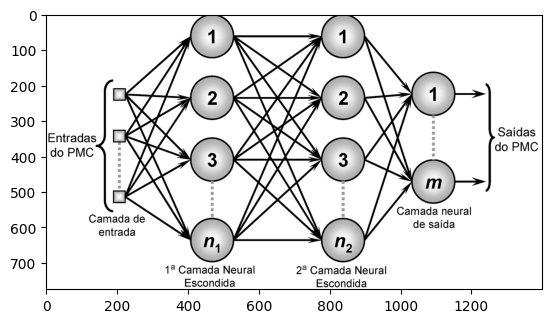

In [49]:
imagem = Image.open('/content/imagem_rede_neural.png')
plt.imshow(imagem)
plt.show()

Aqui geramos as camadas da rede neural,
sendo duas camadas escondidas , lembrando sempre de alterar as camadas 
de ativação não lineares e lineares

In [35]:
class MLP(nn.Module):
  
  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()
    
    self.features = nn.Sequential(
        nn.Linear(input_size, hidden_size,bias=False),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size,bias= False),
        nn.ReLU()
        )
    self.out =  nn.Linear(hidden_size, out_size)
    

  def forward(self, X):
    
    feature = self.features(X)
    output = self.out(feature)
    
    return output

input_size  = len(train_set[0][0])
hidden_size = 128
out_size    = 1  # aqui são o numero de variáveis que vão ser preditas se a pessoa esta viva ou não

net = MLP(input_size, hidden_size, out_size).to(args['device'])

In [36]:
print(net)

MLP(
  (features): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=False)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=False)
    (3): ReLU()
  )
  (out): Linear(in_features=128, out_features=1, bias=True)
)


#**Definindo loss e otimizador**

In [37]:
criterion = nn.L1Loss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

#**Fluxo de Treinamento & Validação**

**Validação**

Para essa etapa, o PyTorch oferece dois artifícios:

*  `model.eval()`: Impacta no forward da rede, informando as camadas caso seu comportamento mude entre fluxos (ex: dropout).
*  `with torch.no_grad()`: Gerenciador de contexto que desabilita o cálculo e armazenamento de gradientes (economia de tempo e memória). Todo o código de validação deve ser executado dentro desse contexto.


Exemplo de código para validação:

```
net.eval()
with torch.no_grad():
  for batch in test_loader:
      # Código de validação
```
Existe o equivalente ao `model.eval()` para explicitar que a sua rede deve estar em modo de treino, é o `model.train()`. Apesar de ser o padrão dos modelos, é boa prática definir também o modo de treinamento

Função para treino

In [38]:
def train(train_loader, net, epoch):

  # Training mode
  net.train()
  
  start = time.time()
  
  epoch_loss  = []
  for batch in train_loader:
    
    dado, rotulo = batch
    
    # Cast do dado na GPU
    dado = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])
    
    # Forward
    ypred = net(dado)
    loss = criterion(ypred, rotulo)
    epoch_loss.append(loss.cpu().data)
    
    # Backpropagation
    loss.backward()
    optimizer.step()
   
  epoch_loss = np.asarray(epoch_loss)
  
  end = time.time()
  print('#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
  
  return epoch_loss.mean()

Função para teste

In [39]:
def test(test_loader,net,epoch):
  
  net.eval()
  start= time.time()
  with torch.no_grad():
    epoch_loss = []
    for batch in test_loader:
      dado, rotulo = batch

      #cast na gpu 
      dado   = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Forward
      pred = net(dado)
      loss = criterion(pred, rotulo)
      epoch_loss.append(loss.cpu().data)

    epoch_loss = np.asarray(epoch_loss)
    end = time.time()
   
    print("Teste  : Epoca %d, Loss: %.4f +/- %.4f" %(epoch, epoch_loss.mean(),epoch_loss.std()))  

Função para validar a rede neural 

In [40]:
def validate(test_loader, net, epoch):

  net.eval()
  
  start = time.time()
  
  epoch_loss  = []

  with torch.no_grad(): 
    for batch in test_loader:

      dado, rotulo = batch

  # Cast do dado na GPU
  dado = dado.to(args['device'])
  rotulo = rotulo.to(args['device'])

  # Forward
  ypred = net(dado)
  loss = criterion(ypred, rotulo)
  epoch_loss.append(loss.cpu().data)

  epoch_loss = np.asarray(epoch_loss)
  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
  return epoch_loss.mean()

Passando a nossa rede neural para por treino e validação

In [41]:
train_losses, test_losses = [], []
for epoch in range(args['epoch_num']):
  train_losses.append(train(train_loader,net,epoch))
  test_losses.append(validate(test_loader, net, epoch))

#################### Train ####################
Epoch 0, Loss: 0.3755 +/- 0.0828, Time: 5.10
********** Validate **********
Epoch 0, Loss: 0.2112 +/- 0.0000, Time: 0.24

#################### Train ####################
Epoch 1, Loss: 0.3738 +/- 0.0791, Time: 0.65
********** Validate **********
Epoch 1, Loss: 0.1644 +/- 0.0000, Time: 0.24

#################### Train ####################
Epoch 2, Loss: 0.3719 +/- 0.0838, Time: 0.66
********** Validate **********
Epoch 2, Loss: 0.3283 +/- 0.0000, Time: 0.23

#################### Train ####################
Epoch 3, Loss: 0.3703 +/- 0.0797, Time: 0.66
********** Validate **********
Epoch 3, Loss: 0.7276 +/- 0.0000, Time: 0.24

#################### Train ####################
Epoch 4, Loss: 0.3686 +/- 0.0834, Time: 0.66
********** Validate **********
Epoch 4, Loss: 0.8996 +/- 0.0000, Time: 0.24

#################### Train ####################
Epoch 5, Loss: 0.3670 +/- 0.0789, Time: 0.63
********** Validate **********
Epoch 5, Loss: 0.1999 +/- 

In [42]:
Xtest = torch.stack([tup[0] for tup in test_set])
Xtest = Xtest.to(args['device'])

ytest = torch.stack([tup[1] for tup in test_set])
ypred = net(Xtest).cpu().data

data = torch.cat((ytest, ypred), axis=1)

df_results = pd.DataFrame(data, columns=['ypred', 'ytest'])
df_results.head(20)

,ypred,ytest
0,0.0,0.095074
1,0.0,0.197606
2,0.0,0.248386
3,0.0,0.075998
4,1.0,0.042414
5,0.0,0.190622
6,0.0,0.148244
7,0.0,0.194379
8,0.0,-0.063430
9,0.0,0.090266


#**Apresentação dos Resultados Finais**

#Gráfico de convergência

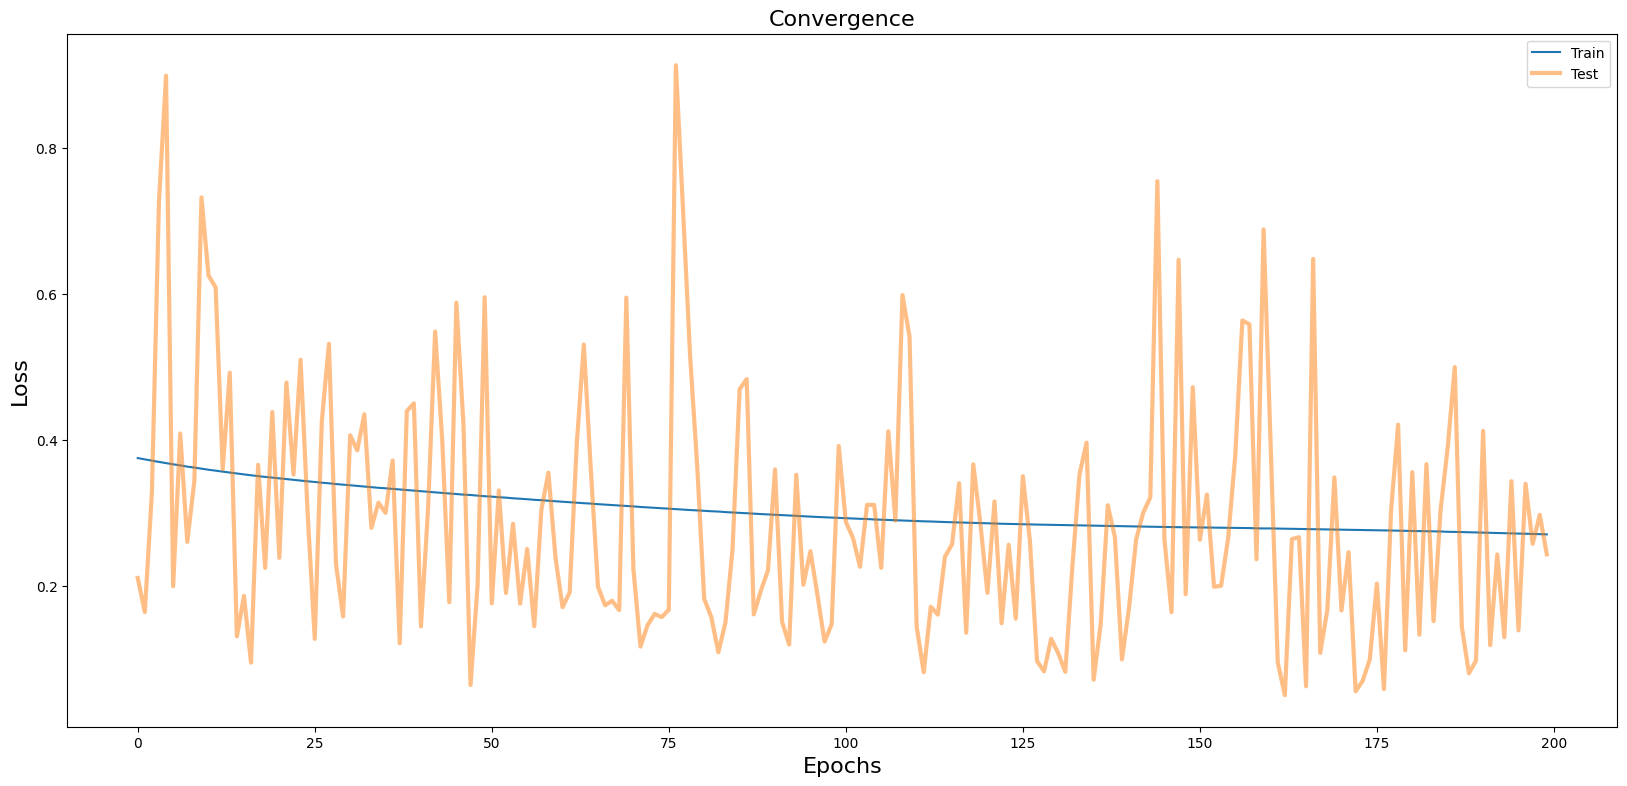

In [43]:
plt.figure(figsize=(20, 9))
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test', linewidth=3, alpha=0.5)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convergence', fontsize=16)
plt.legend()
plt.show()

##Acurácia

Vamos ver a acurácia do nosso modelo pela biblioteca Scitklearn 

In [44]:
y_pred= np.array(ypred)
ypred= y_pred.reshape(805)
ypred = np.round(ypred)


In [45]:
npred = []

for n in ypred:
  if n==1:
    npred.append(1)
  else:
    npred.append(0)  

In [46]:
npred =  np.array(npred)


In [47]:
y_true = np.array(df_test['Status'])


In [48]:
accuracy_score(y_true ,npred)

0.853416149068323